In [43]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [70]:
x_min = 1
x_max = 15.98
value = 10
bidders = 1
alpha = 2
beta_ = 4

Let's imagine that we're trying to buy something on eBAY

0.9989983316656672


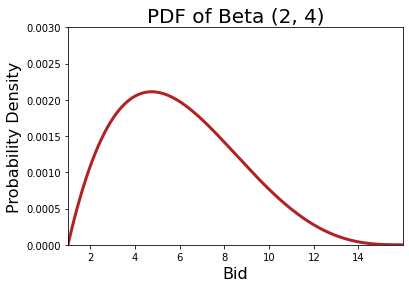

In [62]:
# Simulation with beta distribution - but why to use beta?
x = np.linspace(0, 1, 1000)
y = x*(x_max-x_min) + x_min
prob_y = beta.pdf(x, alpha, beta_)
print(sum(prob_y)/1000) # check
prob_y = prob_y/sum(prob_y) # normalizing the probability of y

plt.title(f"PDF of Beta ({alpha}, {beta_})", fontsize=20)
plt.xlabel("Bid", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(y, prob_y, linewidth=3, color='firebrick')
plt.ylim([0, 0.003])
plt.xlim([x_min, x_max])
plt.show()

In [63]:
# What is the mean?
mean = sum(y*prob_y)
print(mean)

5.993341672230575


In [64]:
# What is the variance?
np.sqrt(sum(y**2*prob_y)-mean**2)

2.669043364239907

In [71]:
# Trying to maximize the expected profit if our private value is 10$ and there're 5 more participants
cumprob_y = beta.cdf(x, alpha, beta_)
exp_profit = (value - y)*(cumprob_y**bidders)
y[np.argmax(exp_profit)]

5.963343343343343

In [36]:
print(value*bidders/(bidders + 1))

9.090909090909092


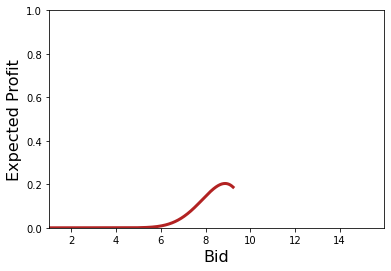

In [38]:
# plt.title("Figure", fontsize=20)
plt.xlabel("Bid", fontsize=16)
plt.ylabel("Expected Profit", fontsize=16)
plt.plot(y[:550], exp_profit[:550], linewidth=3, color='firebrick')
plt.ylim([0, 1])
plt.xlim([x_min, x_max])
plt.show()

Hence, the bid of 271.85 is slightly lower than the reservation price. It is 10% lower.

In [ ]:
# How would this be with 5 bidders?